In [71]:
# Datos
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [72]:
# Cargamos la hoja 2 del excel
cerradas = pd.read_excel("etoro/fer-etoro-account-statement-1-1-2018-12-7-2023.xlsx", sheet_name=1, index_col=0)

In [73]:
def clean_etoro(df):
    df["Fecha de apertura"] = pd.to_datetime(df["Fecha de apertura"], format='%d/%m/%Y %H:%M:%S')
    df["Fecha de cierre"] = pd.to_datetime(df["Fecha de cierre"], format='%d/%m/%Y %H:%M:%S')
    return df

In [74]:
df = clean_etoro(cerradas)

In [75]:
df.head()

,Acción,Importe,Unidades,Fecha de apertura,Fecha de cierre,Apalancamiento,Diferencial,Ganancias (USD),Tasa de apertura,Tasa de cierre,Tasa de «take profit»,Tasa de «stop loss»,Comisiones por renovación de posiciones y dividendos,Copiado desde,Tipo,ISIN,Notas
ID de posición,,,,,,,,,,,,,,,,,
2518785220,Comprar Alphabet Inc Class A,10.0,0.072385,2023-09-18 13:36:32,2023-12-07 15:09:28,1,0.00,-0.13,138.15,136.40,1519.21,136.40,0.00,-,Acciones,US02079K3059,NaN
2516905847,Comprar Alphabet Inc Class A,10.0,0.074145,2023-09-13 13:30:06,2023-12-07 15:09:28,1,0.00,0.11,134.87,136.40,1483.58,136.40,0.00,-,Acciones,US02079K3059,NaN
2567019125,Comprar Alphabet Inc Class A,10.0,0.373495,2023-11-30 15:02:22,2023-12-07 15:01:38,5,0.15,0.94,133.87,136.39,401.61,136.40,-0.13,-,CFD,NaN,NaN
2565094201,Comprar Johnson & Johnson,10.0,0.065876,2023-11-27 14:56:44,2023-12-06 14:32:26,1,0.00,0.42,151.80,158.15,0.00,158.19,0.00,-,Acciones,US4781601046,NaN
2518199610,Comprar Cisco Systems Inc,10.0,0.178603,2023-09-15 14:36:55,2023-12-04 14:33:14,1,0.00,-1.46,55.99,47.80,615.89,47.80,0.05,-,Acciones,US17275R1023,NaN


In [76]:
cerradas_2023 = cerradas[cerradas["Fecha de cierre"].dt.year == 2023]
cerradas_2023 = cerradas_2023.groupby(cerradas_2023["Fecha de cierre"].dt.month)["Ganancias (USD)"].sum()


In [77]:
def plot_pnl_by_month(serie, year):
    # Set the style of the plot
    plt.figure(figsize=(12, 6))
    
    # Add title with date
    plt.title('Total Position PnL by month in ' + str(year))
    
    # Create the bar plot
    sns.barplot(x=serie.index, y=serie.values, hue=serie.index, palette='deep', legend=False)
    
    # Add names of the months on the x-axis
    plt.xticks(np.arange(12), ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                               'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'))
    plt.xticks(rotation=45)
    
    # Add the value of each bar
    for index, row in enumerate(serie):
        plt.text(index, row, str(round(row, 2)), ha="center", va="bottom")
    
    # Add labels for the axes
    plt.xlabel('Month')
    plt.ylabel('PnL')
    
    # The sum of all bars in a legend
    total_pnl = serie.sum()
    plt.legend([f'Total PnL: {round(total_pnl, 2)}'])
    
    plt.grid(True)
    plt.show()


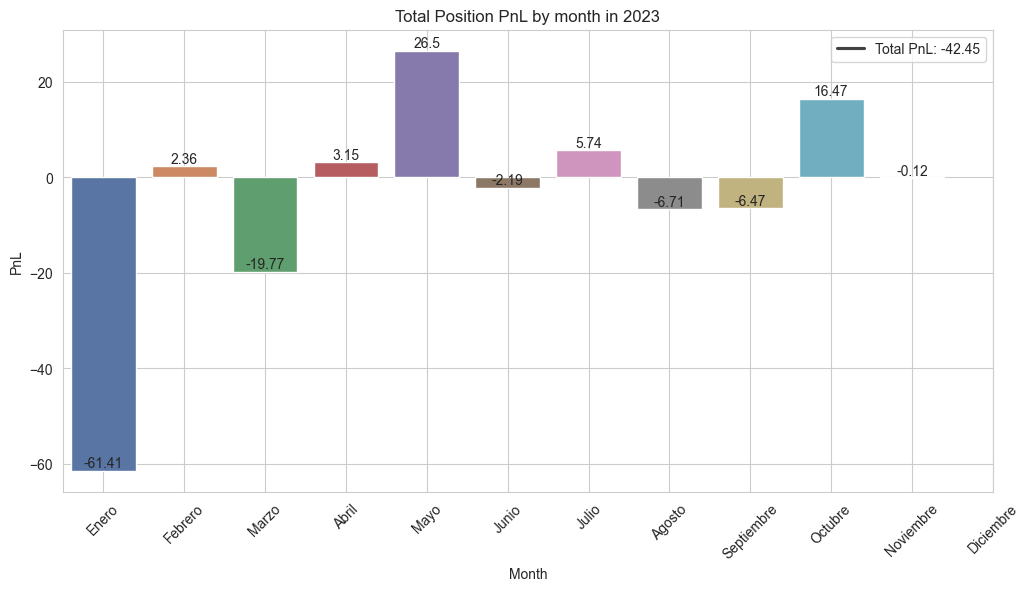

In [78]:
plot_pnl_by_month(cerradas_2023, 2023)